# Starbucks Stocks Analysis

In [ ]:
# iex-cloud
import pandas as pd
import requests
from termcolor import colored as cl
import matplotlib.pyplot as plt

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15,8)

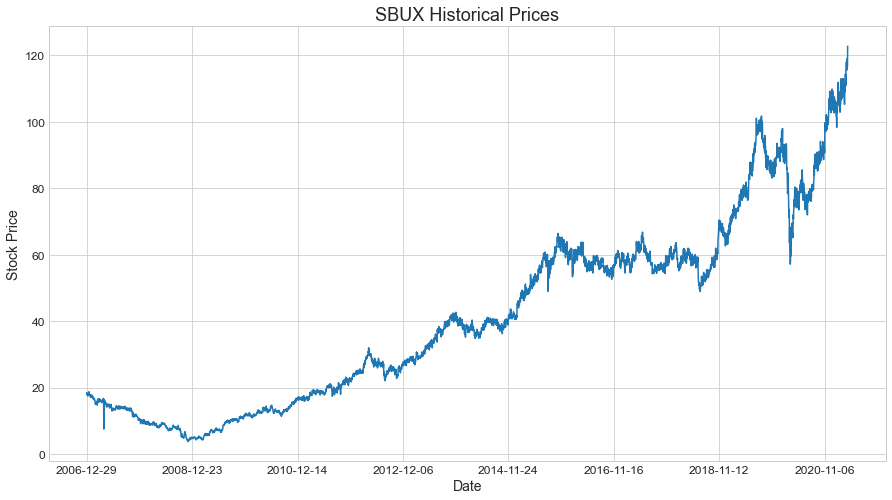

,open,high,low,close
date,,,,
2006-12-29,18.485,18.3370,18.290,18.410
2007-01-03,18.000,18.7000,17.740,18.311
2007-01-04,18.131,17.8100,18.237,18.118
2007-01-05,18.332,17.7940,17.786,18.240
2007-01-08,17.540,18.5059,17.700,17.924
...,...,...,...,...
2021-04-12,115.550,114.7100,113.710,116.230
2021-04-13,118.950,118.0000,115.529,118.530
2021-04-14,116.980,119.3300,119.000,115.300


In [2]:
def get_historic_data(symbol):
    ticker = symbol
    iex_api_key = 'Tsk_30a2677082d54c7b8697675d84baf94b'
    api_url = f'https://sandbox.iexapis.com/stable/stock/{ticker}/chart/max?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    open = []
    high = []
    low = []
    close = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    open_df = pd.DataFrame(open).rename(columns = {0:'open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'high'})
    low_df = pd.DataFrame(low).rename(columns = {0:'low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'close'})
    
    frames = [date_df, open_df, high_df, low_df, close_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('date')
    
    df['open'].plot()
    plt.title('{} Historical Prices'.format(ticker), fontsize = 18)
    plt.xlabel('Date', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    return df

get_historic_data('SBUX')

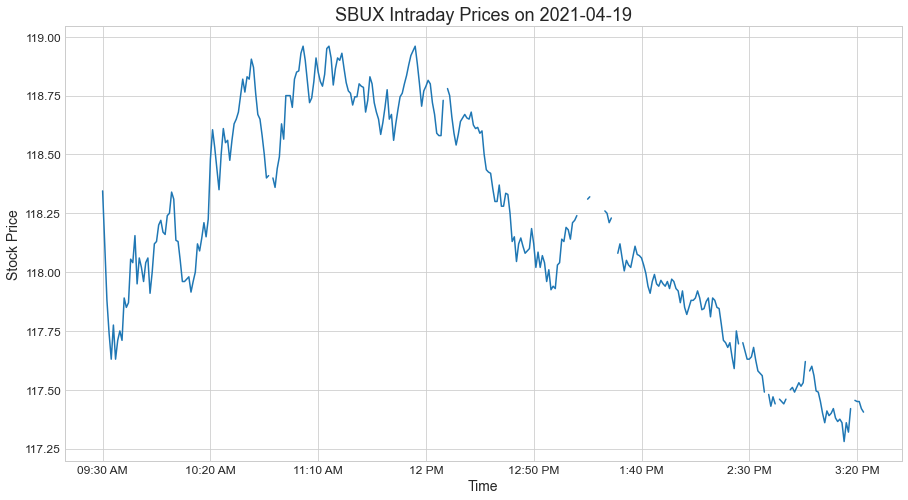

,Date,Open,High,Low,Close,Volume,Number of Trades
Time,,,,,,,
09:30 AM,2021-04-19,118.345,118.345,118.040,118.140,1368,26
09:31 AM,2021-04-19,118.115,118.190,117.945,117.960,512,7
09:32 AM,2021-04-19,117.880,117.895,117.730,117.730,1355,19
09:33 AM,2021-04-19,117.740,117.740,117.570,117.615,1122,20
09:34 AM,2021-04-19,117.630,117.785,117.630,117.770,910,11
...,...,...,...,...,...,...,...
3:19 PM,2021-04-19,117.455,117.480,117.450,117.470,366,8
3:20 PM,2021-04-19,117.450,117.450,117.445,117.445,120,3
3:21 PM,2021-04-19,117.450,117.450,117.390,117.410,943,9


In [8]:
def get_intraday_prices(symbol):
    ticker = symbol
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices?token={iex_api_key}'
    df = requests.get(url).json()
    date = df[1]['date']
    
    dmy = []
    time = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    number_of_trades = []
    
    for i in range(len(df)):
        dmy.append(df[i]['date'])
        time.append(df[i]['label'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
        volume.append(df[i]['volume'])
        number_of_trades.append(df[i]['numberOfTrades'])
        
    date_df = pd.DataFrame(dmy).rename(columns = {0:'Date'})
    time_df = pd.DataFrame(time).rename(columns = {0:'Time'})
    open_df = pd.DataFrame(open).rename(columns = {0:'Open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'High'})
    low_df = pd.DataFrame(low).rename(columns = {0:'Low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'Close'})
    volume_df = pd.DataFrame(volume).rename(columns = {0:'Volume'})
    number_of_trades_df = pd.DataFrame(number_of_trades).rename(columns = {0:'Number of Trades'})
     
    frames = [date_df, time_df, open_df, high_df, low_df, close_df, volume_df, number_of_trades_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('Time')

    df['Open'].plot()
    plt.title(f'{ticker} Intraday Prices on {date}', fontsize = 18)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    return df

get_intraday_prices('SBUX')

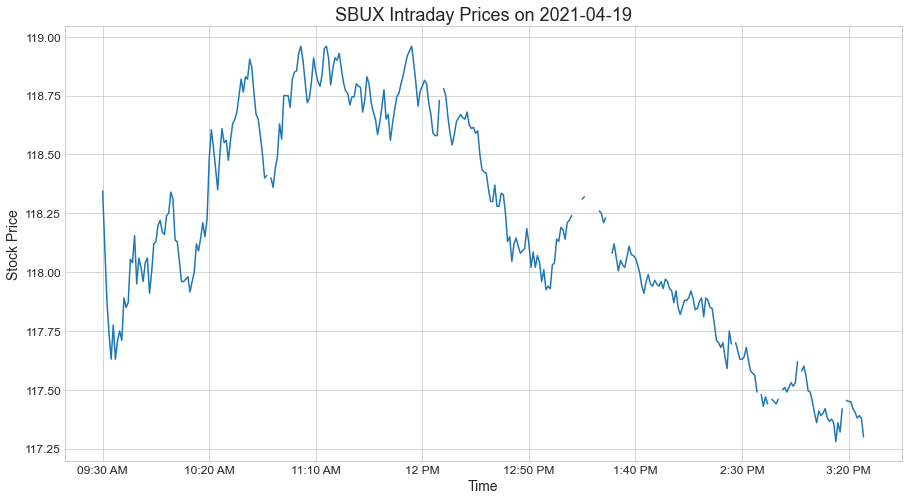

In [10]:
symbol = "SBUX"

ticker = symbol
iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
url = f'https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices?token={iex_api_key}'
df = requests.get(url).json()
date = df[1]['date']

dmy = []
time = []
open = []
high = []
low = []
close = []
volume = []
number_of_trades = []

for i in range(len(df)):
    dmy.append(df[i]['date'])
    time.append(df[i]['label'])
    open.append(df[i]['open'])
    high.append(df[i]['high'])
    low.append(df[i]['low'])
    close.append(df[i]['close'])
    volume.append(df[i]['volume'])
    number_of_trades.append(df[i]['numberOfTrades'])

date_df = pd.DataFrame(dmy).rename(columns = {0:'Date'})
time_df = pd.DataFrame(time).rename(columns = {0:'Time'})
open_df = pd.DataFrame(open).rename(columns = {0:'Open'})
high_df = pd.DataFrame(high).rename(columns = {0:'High'})
low_df = pd.DataFrame(low).rename(columns = {0:'Low'})
close_df = pd.DataFrame(close).rename(columns = {0:'Close'})
volume_df = pd.DataFrame(volume).rename(columns = {0:'Volume'})
number_of_trades_df = pd.DataFrame(number_of_trades).rename(columns = {0:'Number of Trades'})

frames = [date_df, time_df, open_df, high_df, low_df, close_df, volume_df, number_of_trades_df]
df = pd.concat(frames, axis = 1, join = 'inner')
df = df.set_index('Time')

df['Open'].plot()
plt.title(f'{ticker} Intraday Prices on {date}', fontsize = 18)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Stock Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [11]:
print(df)

                Date     Open     High      Low    Close  Volume  \
Time                                                               
09:30 AM  2021-04-19  118.345  118.345  118.040  118.140    1368   
09:31 AM  2021-04-19  118.115  118.190  117.945  117.960     512   
09:32 AM  2021-04-19  117.880  117.895  117.730  117.730    1355   
09:33 AM  2021-04-19  117.740  117.740  117.570  117.615    1122   
09:34 AM  2021-04-19  117.630  117.785  117.630  117.770     910   
...              ...      ...      ...      ...      ...     ...   
3:23 PM   2021-04-19  117.405  117.450  117.370  117.390     932   
3:24 PM   2021-04-19  117.380  117.380  117.365  117.365     110   
3:25 PM   2021-04-19  117.390  117.390  117.380  117.380      50   
3:26 PM   2021-04-19  117.380  117.380  117.350  117.370     501   
3:27 PM   2021-04-19  117.300  117.310  117.295  117.310     438   

          Number of Trades  
Time                        
09:30 AM                26  
09:31 AM                 7  

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 09:30 AM to 3:27 PM
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              358 non-null    object 
 1   Open              341 non-null    float64
 2   High              341 non-null    float64
 3   Low               341 non-null    float64
 4   Close             341 non-null    float64
 5   Volume            358 non-null    int64  
 6   Number of Trades  358 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 22.4+ KB
None


In [13]:
print(df.describe())

             Open        High         Low       Close       Volume  \
count  341.000000  341.000000  341.000000  341.000000   358.000000   
mean   118.191745  118.215674  118.162874  118.189238   585.740223   
std      0.469241    0.472543    0.467227    0.471013   539.292546   
min    117.280000  117.310000  117.280000  117.290000     0.000000   
25%    117.880000  117.890000  117.850000  117.880000   200.000000   
50%    118.140000  118.170000  118.120000  118.140000   468.000000   
75%    118.650000  118.670000  118.615000  118.645000   806.250000   
max    118.960000  118.980000  118.945000  118.960000  3775.000000   

       Number of Trades  
count        358.000000  
mean           7.245810  
std            5.720955  
min            0.000000  
25%            3.000000  
50%            6.000000  
75%           10.000000  
max           37.000000  


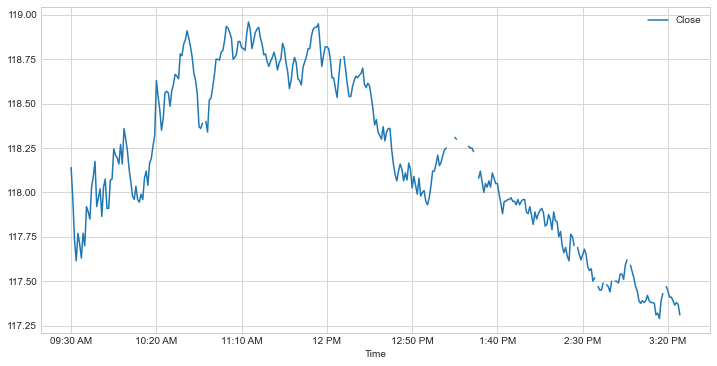

In [14]:
# Let's see a historical view of the closing price
df['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

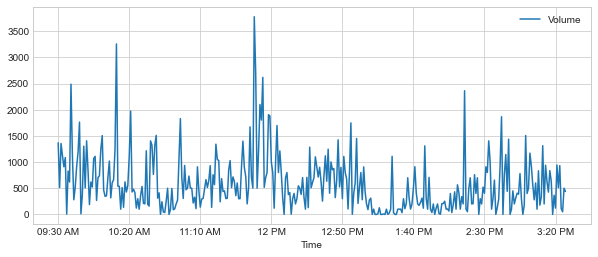

In [15]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
df['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [16]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

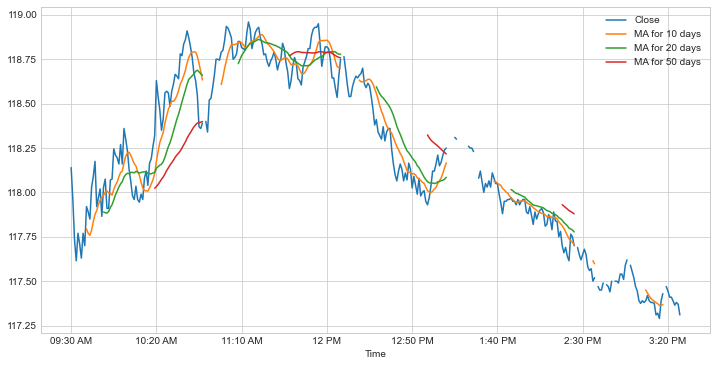

In [17]:
df[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

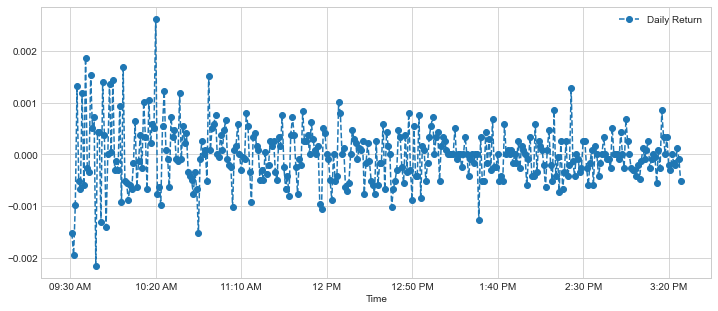

In [19]:
# use pct_change to find the percent change for each day
df['Daily Return'] = df['Close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

C:\Users\Shubham\anaconda3\envs\starbucks-analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


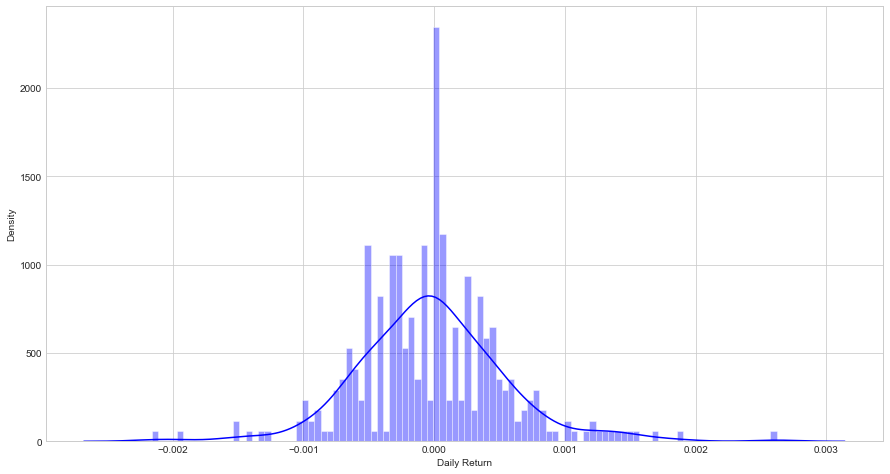

In [22]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(df['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

In [26]:
closing_df1 = pd.DataFrame(df['Close'])
close1  = closing_df1.rename(columns={"close": "SBUX_close"})
closing_df = pd.concat([close1], axis=1)
closing_df.head()

,Close
Time,
09:30 AM,118.140
09:31 AM,117.960
09:32 AM,117.730
09:33 AM,117.615
09:34 AM,117.770


In [27]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

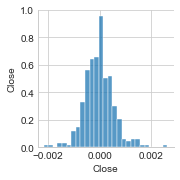

In [29]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())
plt.show()

In [37]:
def BinaryReversal(str) :
     
    rev = 0
     
    # traversing bits of 'n' from the right
    while (str > 0) :
         
        # bitwise left shift 'rev' by 1
        rev = rev << 1
         
        # if current bit is '1'
        if (str & 1 == 1) :
            rev = rev ^ 1
         
        # bitwise right shift 'str' by 1
        str = str >> 1
         
     
    # required number
    return rev
     
# Driver code
str = 4567 # Input
print(BinaryReversal(str)) # Output

7537


In [42]:
# Python 3 program to invert actual 
# bits of a number.
import math
  
def invertBits(num):
      
    # calculating number of 
    # bits in the number
    x = int(math.log(num, 2.0) + 1);
  
    # Inverting the bits
    # one by one
    for i in range(0, x): 
        num = (num ^ (1 << i)); 
  
    print(num);
  
# Driver code
num = 4567; 
invertBits(num);
  
# This code is contributed 
# by Akanksha Rai

3624


In [48]:
# Function to reverse bits of a given integer
def reverseBits(n):
 
    pos = SIZE - 1      # maintains shift
 
    # store reversed bits of `n`. Initially, all bits are set to 0
    reverse = 0
 
    # do till all bits are processed
    while pos >= 0 and n:
 
        # if the current bit is 1, then set the corresponding bit in the result
        if n & 1:
            reverse = reverse | (1 << pos)
 
        n >>= 1         # drop current bit (divide by 2)
        pos = pos - 1   # decrement shift by 1
 
    return reverse
 
 
if __name__ == '__main__':
 
    n = 4567
    SIZE = 12
 
    print(n, "in binary is" + bin(n))
    print("On reversing bits", bin(reverseBits(n)))

4567 in binary is0b1000111010111
On reversing bits 0b111010111000


In [53]:
 #Python 3 implementation to
# reverse bits of a number
 
 
# function to reverse
# bits of a number
def reverseBits(n) :
     
    rev = 0
     
    # traversing bits of 'n' from the right
    while (n > 0) :
         
        # bitwise left shift 'rev' by 1
        rev = rev << 1
         
        # if current bit is '1'
        if (n & 1 == 1) :
            rev = rev ^ 1
         
        # bitwise right shift 'n' by 1
        n = n >> 1
         
     
    # required number
    return rev
     
# Driver code
n = 4567
print(reverseBits(n))
 
 
# This code is contributed
# by Nikita Tiwari.

7537


In [64]:
# Function to reverse bits of positive  
# integer number 
    
def reverseBits(num,bitSize): 
    
     # convert number into binary representation 
     # output will be like bin(10) = '0b10101' 
     binary = bin(num) 
    
     # skip first two characters of binary 
     # representation string and reverse 
     # remaining string and then append zeros 
     # after it. binary[-1:1:-1]  --> start 
     # from last character and reverse it until 
     # second last character from left 
     reverse = binary[-1:1:-1] 
     reverse = reverse + (bitSize - len(reverse))*'0'
    
     # converts reversed binary string into integer 
     print (int(reverse,2)) 
    
# Driver program 
if __name__ == "__main__": 
    num = 4567
    bitSize = 5
    reverseBits(num,bitSize)

7537


In [71]:
# Python Program reverse bits of positive integer number
def integernumber(n,bit_size):
    bin_number = bin(n)
    reverse_number = bin_number[-1:1:-1]
    reverse_number = reverse_number + (bit_size - len(reverse_number))*'0'
    print ("Reverse Bits ::>",int(reverse_number,2))
# Driver program
if __name__ == "__main__":
    n = int(input("Enter Number ::>"))
    bit_size = int(input("Enter Bit Size ::>")) 
    integernumber(n,bit_size)

Enter Number ::>4567
Enter Bit Size ::>6
Reverse Bits ::> 7537
